## Problem Statement :
    
    Uncover the factors that lead to employee attrition. 
    Note - This is a fictional data set created by IBM data scientists.

#### Categorical Columns :

Education 

    1. Below College; 2. College; 3. Bachelor; 4. Master; 5. Doctor

EnvironmentSatisfaction
    
    1. Low; 2. Medium; 3. High; 4. Very High

JobInvolvement
    
    1. Low; 2. Medium; 3. High; 4. Very High

JobSatisfaction

    1. Low; 2. Medium; 3. High; 4. Very High

PerformanceRating

    1. Low; 2. Good; 3. Excellent; 4. Outstanding
    
RelationshipSatisfaction

    1. Low; 2. Medium; 3. High; 4. Very High

WorkLifeBalance 

    1. Bad; 2. Good; 3. Better; 4. Best
    

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
att = pd.read_csv('HR-Employee-Attrition.csv')
att.head()

FileNotFoundError: [Errno 2] File b'HR-Employee-Attrition.csv' does not exist: b'HR-Employee-Attrition.csv'

## Basic Exploratory Data Analysis

#### Checking for missing Values

In [3]:
att.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This dataset has no Null Values

#### Pandas Profiling

In [ ]:

profile = pandas_profiling.ProfileReport(att)
profile.to_file(output_file="hr_attrition_profiling.html")


#### Checking for Correlation between features

In [4]:
att.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

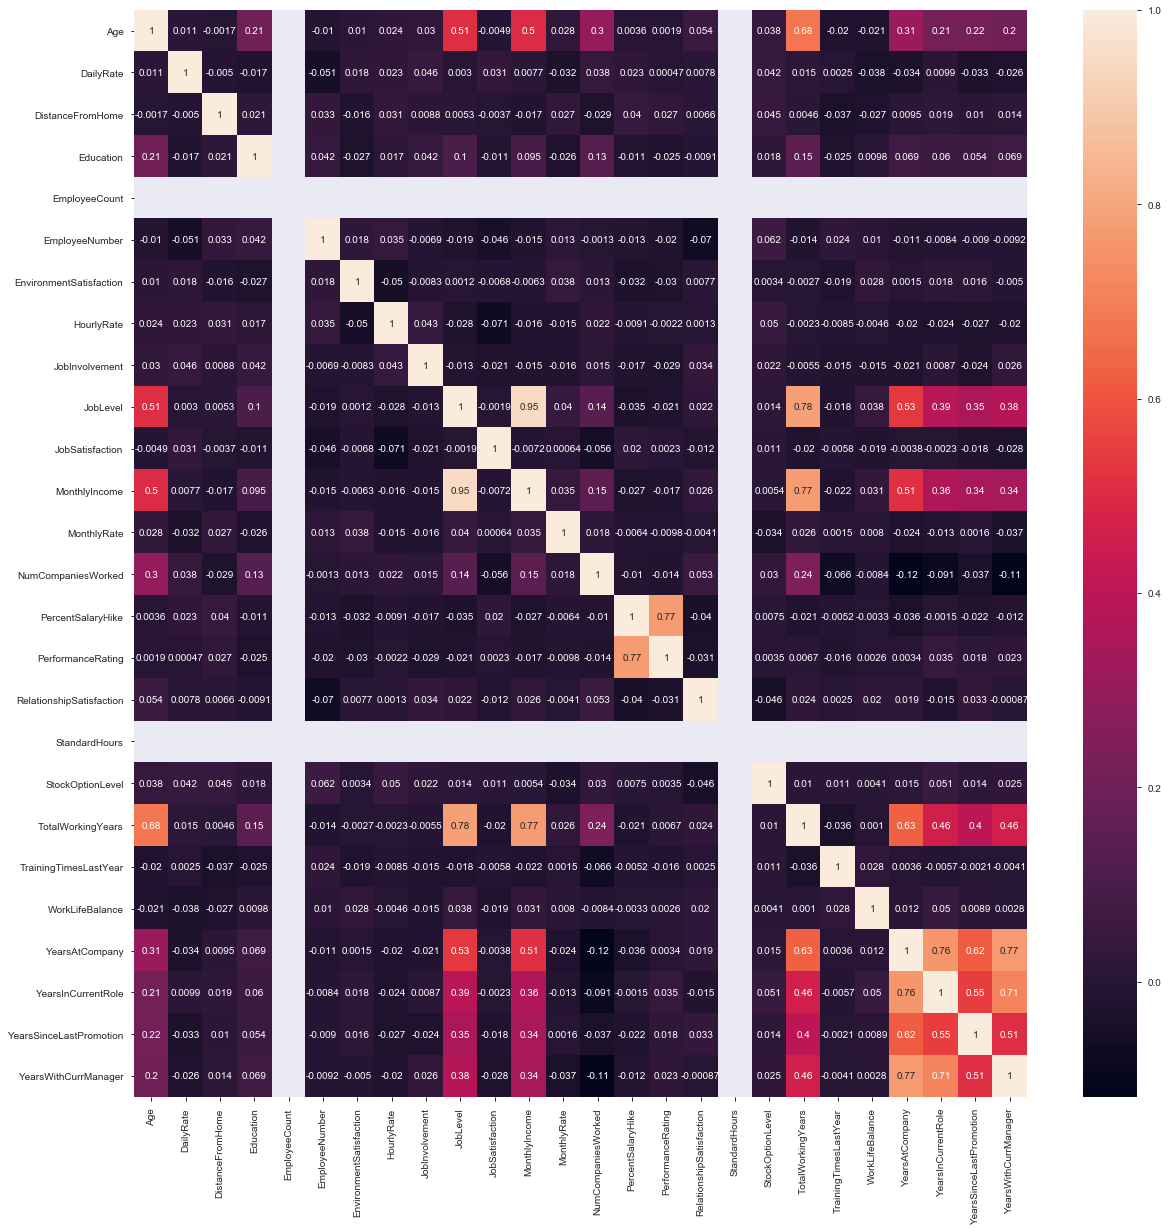

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(att.corr(),annot = True)

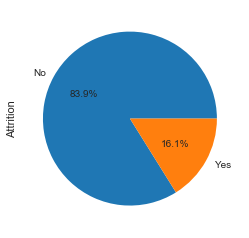

In [9]:
att['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%')

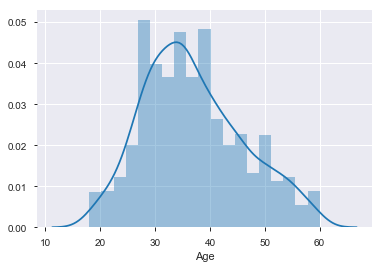

In [10]:
sns.distplot(att['Age'])

## Bivariate Analysis 

C:\Users\Alankar Patra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alankar Patra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


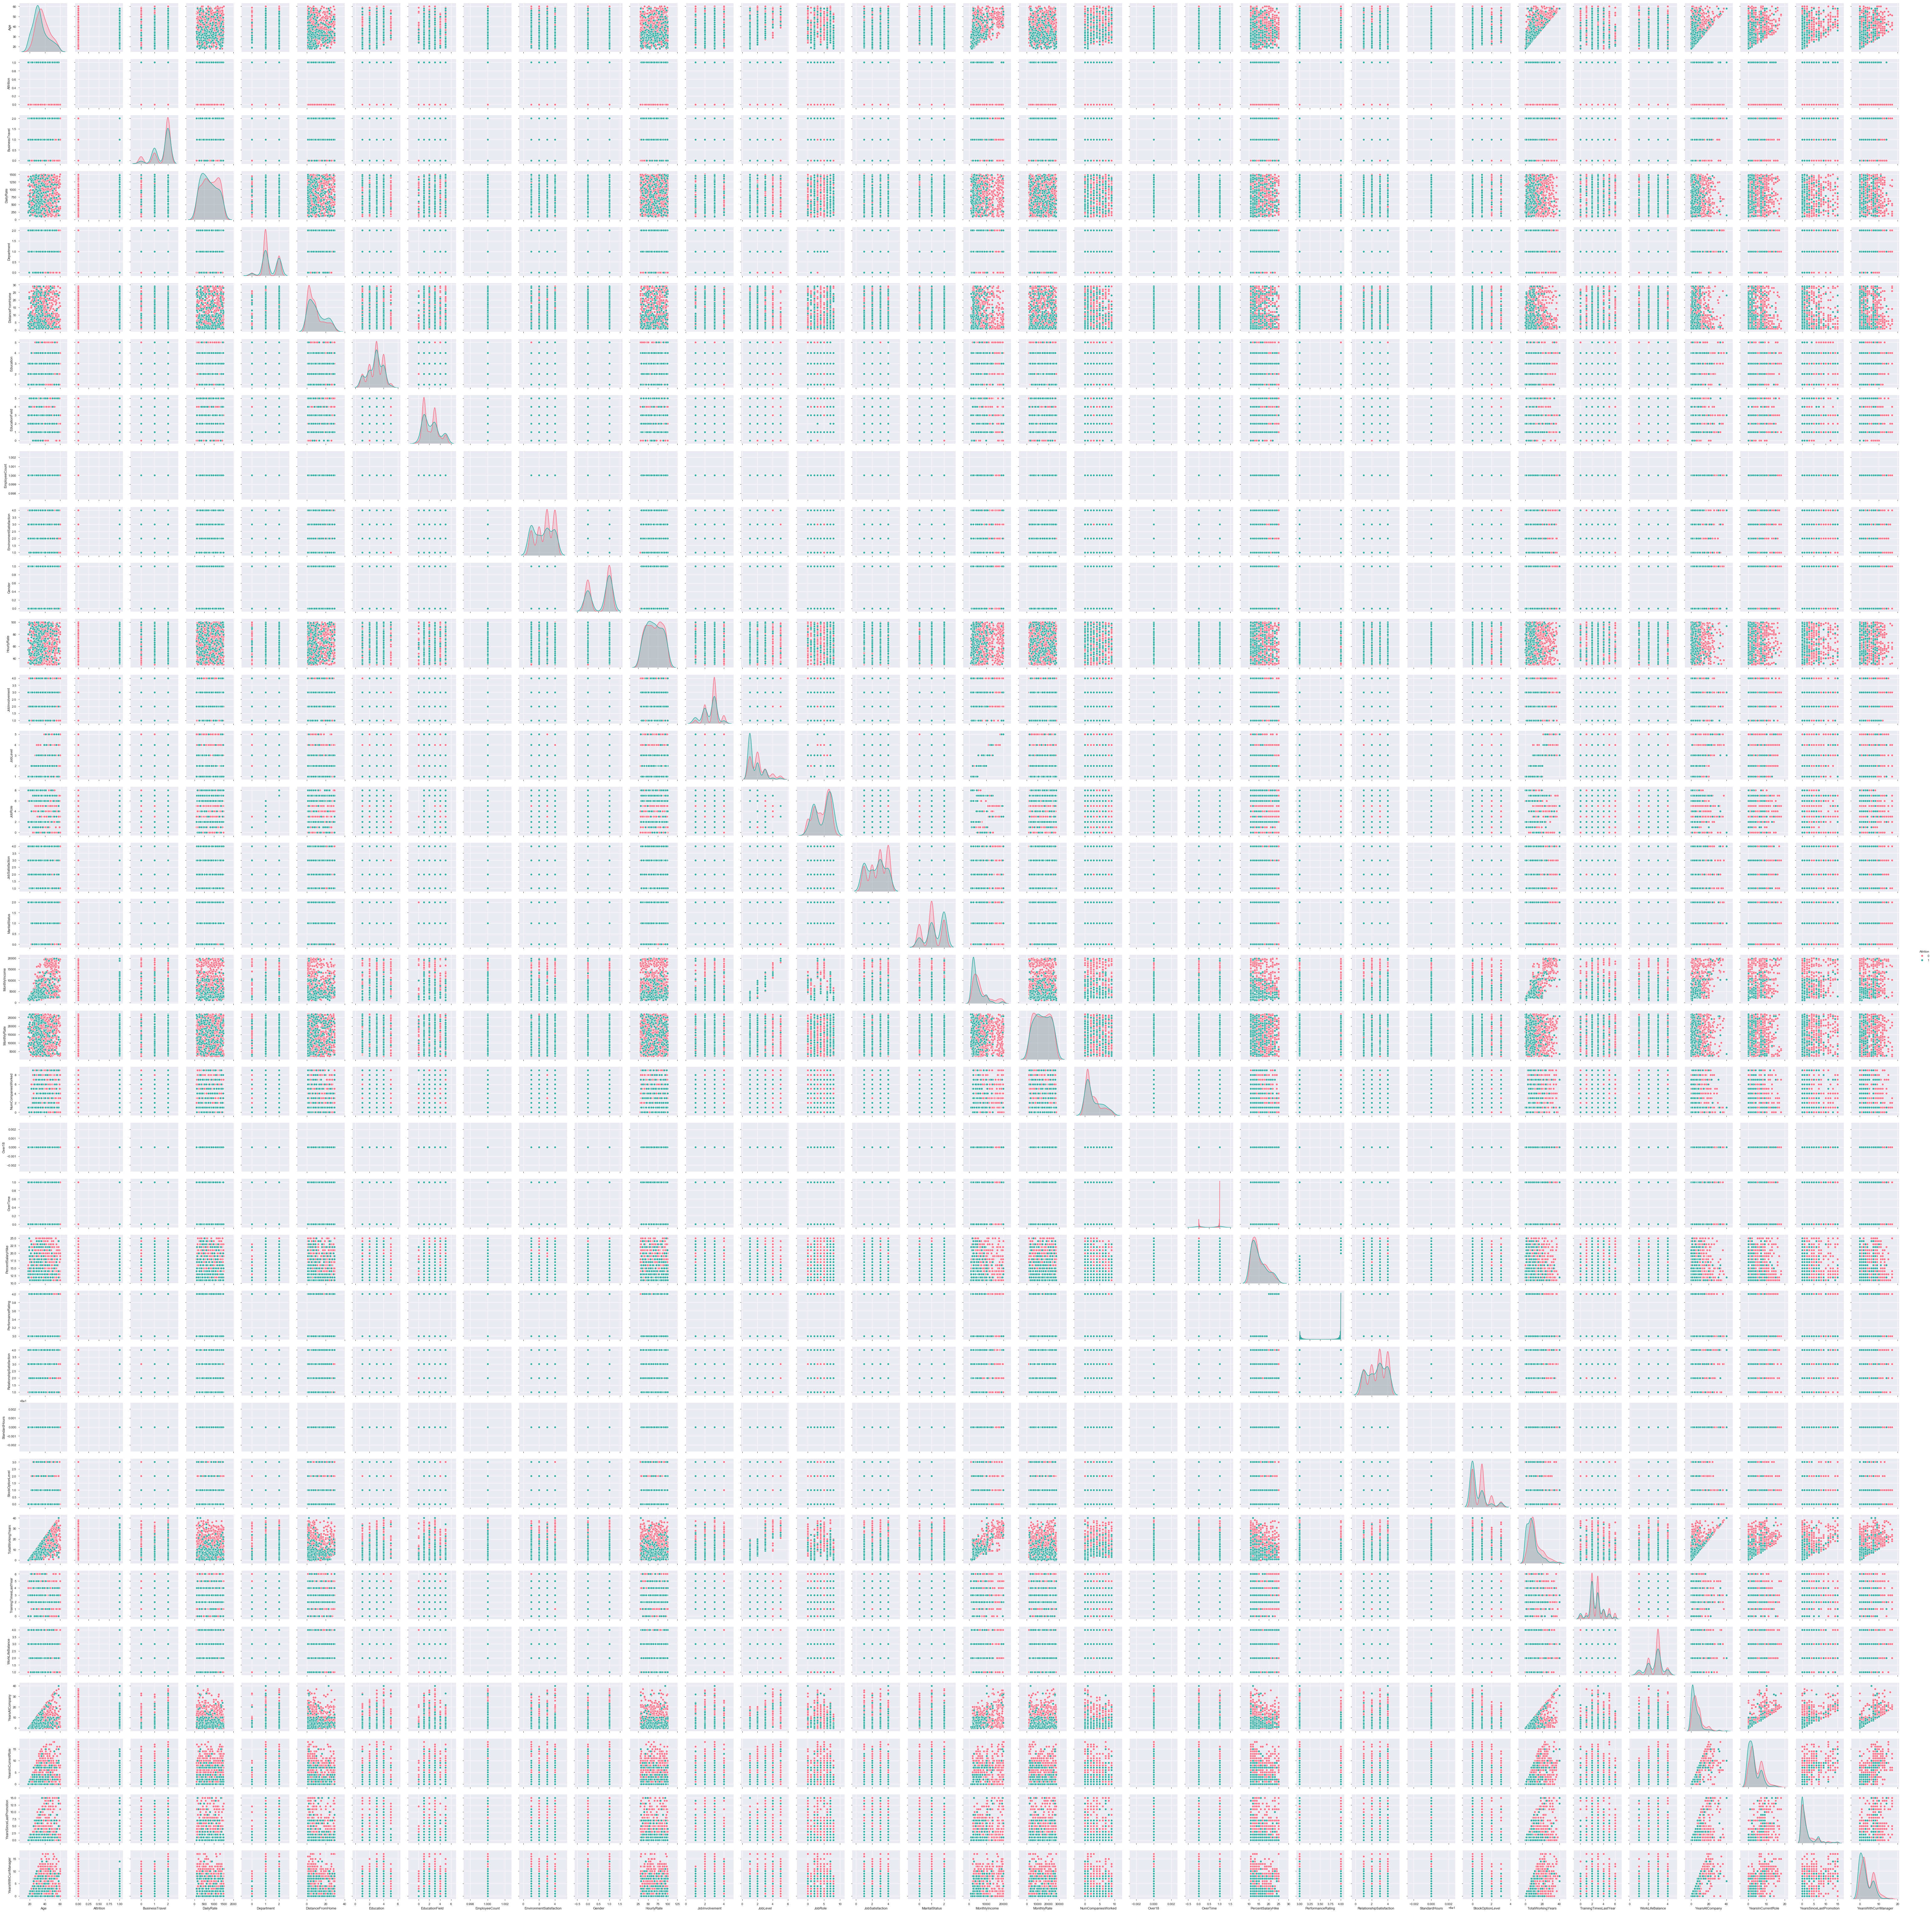

In [58]:
sns.pairplot(data=att,hue='Attrition',palette='husl')

#### Relation between Age of an employee and Attrition 

Text(0.5, 1.0, 'Age vs Attribuion')

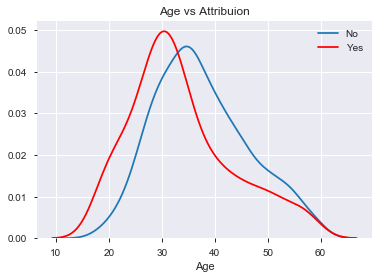

In [9]:
sns.distplot(att[att['Attrition'] == 'No']['Age'], hist = False, label = 'No')
sns.distplot(att[att['Attrition'] == 'Yes']['Age'], hist = False, color ='r', label = 'Yes')
plt.title('Age vs Attribuion')

On an average the age of an employee leaving the is less than that of an employee staying with the company.
Age of the employees leaving the company is in the range on 20-40 years

#### Relation between Salary hike percent and Attrition 

Text(0.5, 1.0, 'PercentSalaryHike vs Attribuion')

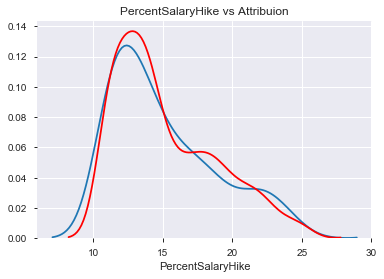

In [14]:
sns.distplot(att[att['Attrition'] =='Yes']['PercentSalaryHike'], hist =False)
sns.distplot(att[att['Attrition'] =='No']['PercentSalaryHike'], hist =False, color ='r')
plt.title('PercentSalaryHike vs Attrition')


Salary Hike does not seem to play a vital role for an employee to leave the company

#### Relation between years spent at the company and Attrition 

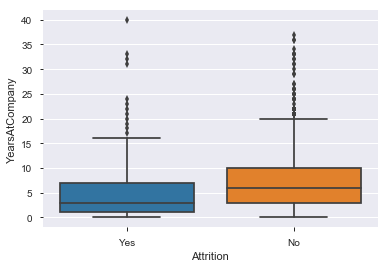

In [15]:
sns.boxplot(att['Attrition'],att['YearsAtCompany'])


Mostly people who leave the company spend less than 3 years with the company

#### Relation between Distance of employee's home from workplace and Attrition 

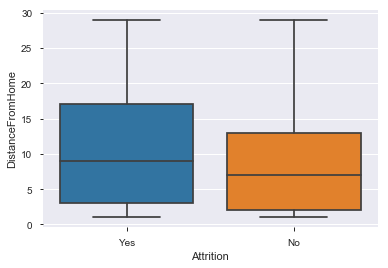

In [12]:
sns.boxplot(att['Attrition'],att['DistanceFromHome'])

Distance from home plays a minor role for an employee to leave the company

#### Relation between Gender of the employee and Attrition 

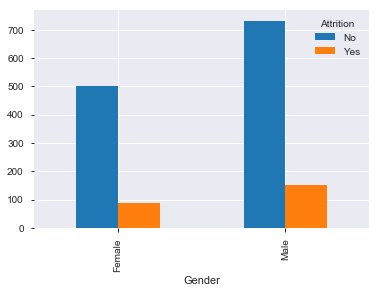

In [16]:
ct = pd.crosstab(att['Gender'], att['Attrition'])
ct.plot(kind = 'bar')

On a general view, Attrition does not seem to be gender biased

#### Relation between job roles involving travel and Attrition 

Attrition           No  Yes       per
BusinessTravel                       
Non-Travel         138   12  0.080000
Travel_Frequently  208   69  0.249097
Travel_Rarely      887  156  0.149569

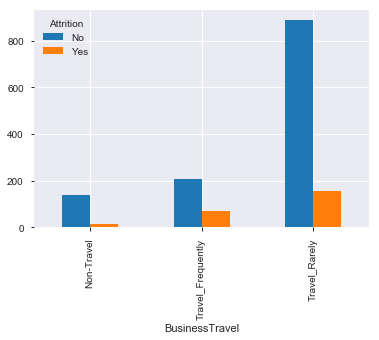

In [14]:
a = pd.crosstab(att['BusinessTravel'], att['Attrition'])
a.plot(kind='bar')

a['per'] = a['Yes']/(a['Yes']+a['No'])
a

Out of all the employees the attrition rate for Travel Frequently group is the highest

####  Relation between Department and Attrition

In [16]:
a = pd.crosstab(att['Department'], att['Attrition'])
a['total'] = a['No']+a['Yes']
a['per'] = a['Yes']/(a['Yes']+a['No'])
a

Attrition                No  Yes  total       per
Department                                       
Human Resources          51   12     63  0.190476
Research & Development  828  133    961  0.138398
Sales                   354   92    446  0.206278

The company employees most peopple in the R&D department and the attrition rate for this department is lower than the other two departments

In [18]:
#att = att.set_index('EmployeeNumber', drop =True)

#### Relation between Employee's qualification and Attrition

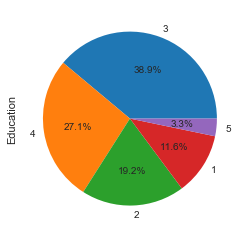

In [19]:
att.Education.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

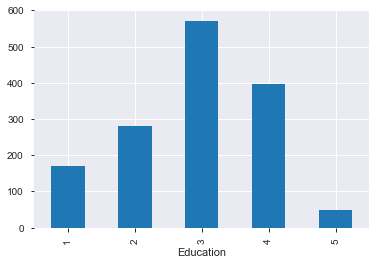

In [20]:
att.groupby(['Education'])['Attrition'].count().plot(kind = 'bar')


Employees with Bachelors degree have highest attrition rate followed by employees with Masters degree

#### Relation between Marital Status of the employee and Attrition

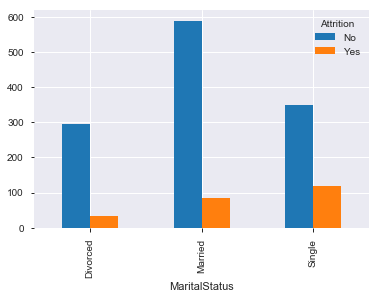

In [21]:
pd.crosstab( att.MaritalStatus, att.Attrition).plot(kind = 'bar')

Most often than not, employees leave the organisation before getting married at least once

#### Relation between Job role of the employee and Attrition

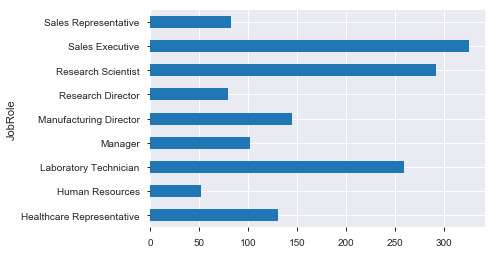

In [22]:
att.groupby(['JobRole'])['Attrition'].count().plot(kind = 'barh')

Sales executives have the highest attrition rate followed by Research Scientists and Laboratory Technicians.

#### Relation between Monthly income of the employee and Attrition

Text(0, 0.5, 'Average Monthly Income')

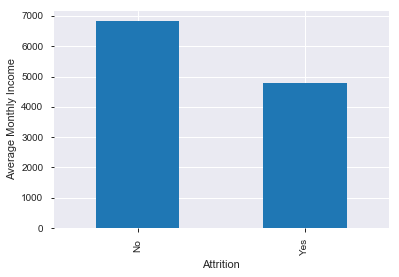

In [23]:
att.groupby(['Attrition']).mean()['MonthlyIncome'].plot(kind = 'bar')
plt.ylabel('Average Monthly Income')

On an average, employees who leave the company have comparatively less monthly income than other employees

#### Relation between Working condition and Attrition

In [24]:
a = pd.crosstab( att.EnvironmentSatisfaction, att.Attrition)
a

Attrition                 No  Yes
EnvironmentSatisfaction          
1                        212   72
2                        244   43
3                        391   62
4                        386   60

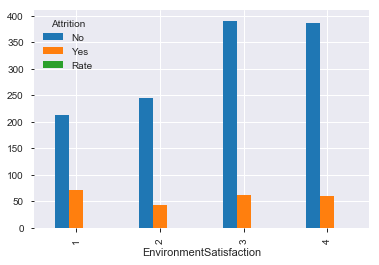

In [28]:
a['Rate'] = a["Yes"]/(a["Yes"]+a["No"])
a.plot(kind = 'bar')

Text(0.5, 0, 'Environment_Satisfaction')

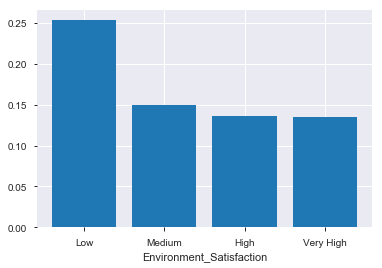

In [29]:
plt.bar(a.index,a.Rate)
plt.xticks(a.index,['Low','Medium','High','Very High'])
plt.xlabel('Environment_Satisfaction')

On an average, most employees who are not satisfied with the working environment leave the organisation

#### Relation between Stock option level of the employee and Attrition

In [25]:
b = pd.crosstab( att.StockOptionLevel, att.Attrition)
b

Attrition          No  Yes
StockOptionLevel          
0                 477  154
1                 540   56
2                 146   12
3                  70   15

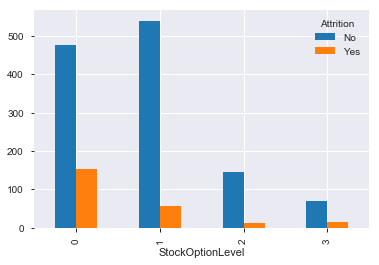

In [26]:
b.plot(kind = 'bar')

Text(0.5, 0, 'Stock Option ')

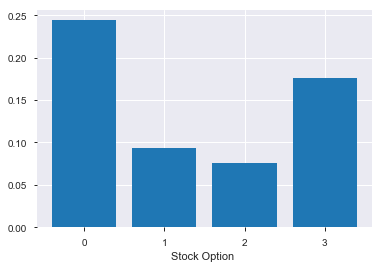

In [33]:
b['Rate'] = b["Yes"]/(b["No"]+b["Yes"])
plt.bar(b.index,b.Rate)
plt.xticks(b.index,['0','1','2','3'])
plt.xlabel('Stock Option ')

On an average most employees without any stock option leave the organisation

# Model Building :

#### Applying Label Encoding 

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

att['Attrition']  = le.fit_transform(att['Attrition'])
att['BusinessTravel']  = le.fit_transform(att['BusinessTravel'])
att['Department']  = le.fit_transform(att['Department'])
att['EducationField']  = le.fit_transform(att['EducationField'])
att['Gender']  = le.fit_transform(att['Gender'])
att['JobRole']  = le.fit_transform(att['JobRole'])
att['MaritalStatus']  = le.fit_transform(att['MaritalStatus'])
att['Over18']  = le.fit_transform(att['Over18'])
att['OverTime']  = le.fit_transform(att['OverTime'])


In [7]:
att.head(2)                                    #Check for successful implementation

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  

[2 rows x 35 columns]

#### Defining the target variable 

In [8]:
X = att.drop('Attrition', axis=1)               #Independent Variables
y= att['Attrition']                             #Dependent Variable

#### Applying Train Test split on the dataset 

In [9]:
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 5)

#### Now lets apply different models and look at their accuracy scores 

### Decision Tree Modeling:

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

#### Searching for best parameters 

In [11]:
tree_params ={'criterion' : ['gini','entropy'],
             'splitter' : ['best', 'random'],
              'max_depth' : [3,4,5,6],
              'max_features' : ['auto', 'log2'],
              "random_state" : [5]
             }

grid = GridSearchCV(clf , tree_params, cv =10)

In [12]:
best_parameters_search = grid.fit(x_train,y_train)
best_parameters_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 5,
 'splitter': 'random'}

In [13]:
from sklearn.metrics import classification_report

a= grid.fit(x_train, y_train)
y_pred = a.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       365
           1       0.50      0.16      0.24        76

   micro avg       0.83      0.83      0.83       441
   macro avg       0.67      0.56      0.57       441
weighted avg       0.79      0.83      0.79       441



### SMOTE Technique

In [14]:
# since there is imbalance in the target variable we are using SMOTE over-sampling techique

from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_resampled, y_resampled = smo.fit_resample(X, y)

In [15]:
x_train,  x_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state = 5)

In [16]:
a= grid.fit(x_train, y_train)
y_pred_dt = a.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       359
           1       0.82      0.69      0.75       381

   micro avg       0.76      0.76      0.76       740
   macro avg       0.77      0.76      0.76       740
weighted avg       0.77      0.76      0.76       740



### Random Forest Modeling

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

a_rf= RF.fit(x_train, y_train)
y_pred_rf = a_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       359
           1       0.88      0.81      0.85       381

   micro avg       0.85      0.85      0.85       740
   macro avg       0.85      0.85      0.85       740
weighted avg       0.85      0.85      0.85       740



C:\Users\Alankar Patra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Ranking the features in descending order

In [18]:
fe = RF.feature_importances_
fe = pd.Series(fe, index=X.columns)
fe.sort_values(ascending =False)

JobInvolvement              0.073075
StockOptionLevel            0.071188
MonthlyIncome               0.058126
EnvironmentSatisfaction     0.057618
JobSatisfaction             0.052545
TotalWorkingYears           0.047842
DistanceFromHome            0.045239
YearsInCurrentRole          0.038794
JobLevel                    0.038134
EmployeeNumber              0.037965
DailyRate                   0.037271
RelationshipSatisfaction    0.036151
YearsAtCompany              0.035686
Age                         0.034765
MonthlyRate                 0.034513
Education                   0.034013
WorkLifeBalance             0.031418
YearsWithCurrManager        0.026306
TrainingTimesLastYear       0.024941
HourlyRate                  0.023622
PercentSalaryHike           0.023370
YearsSinceLastPromotion     0.020461
NumCompaniesWorked          0.019777
BusinessTravel              0.019367
EducationField              0.017573
MaritalStatus               0.015221
JobRole                     0.014597
D

#### Tuning the parameters using GridSearchCV

In [20]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RF, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)


In [21]:
bestF = gridF.fit(x_train, y_train)
y_pred_f = bestF.predict(x_test)
print(classification_report(y_test, y_pred_f))
bestF.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  8.4min finished


              precision    recall  f1-score   support

           0       0.87      0.91      0.89       359
           1       0.91      0.87      0.89       381

   micro avg       0.89      0.89      0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

### Random Forest-Boost Modeling:

In [22]:
from sklearn.ensemble import AdaBoostClassifier
rf = RandomForestClassifier(max_depth= 25, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 500)
rf_Boost = AdaBoostClassifier(base_estimator=rf,n_estimators=100,learning_rate=0.01,random_state=1)

In [23]:
bestrfb = rf_Boost.fit(x_train, y_train)
y_pred_rfb = bestrfb.predict(x_test)
print(classification_report(y_test, y_pred_rfb))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       359
           1       0.93      0.87      0.90       381

   micro avg       0.90      0.90      0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



### Confusion Matrix 

Since we got highest f1_score for Random Forest Boost, we will consider this for further analysis

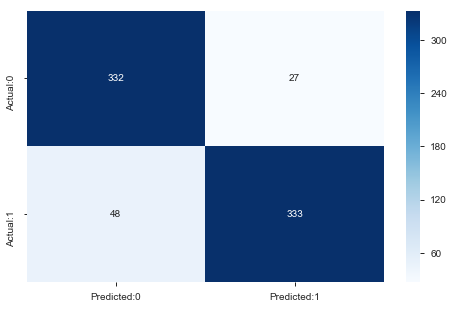

In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rfb)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap=plt.cm.Blues)

### ROC Curve

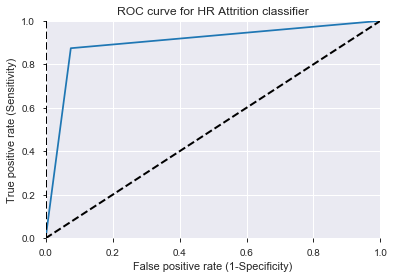

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfb)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.title('ROC curve for HR Attrition classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

### Model Accuracy

In [54]:
score = roc_auc_score(y_test,y_pred_rfb)
print('Model Accuracy Score: ', score)

Model Accuracy Score:  0.8994034171912356
